importing libraries


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE

loading dataset


In [7]:
df =pd.read_csv('spam.csv',encoding='latin-1')
df=df[['v1','v2']]
df.columns=['label','text']


In [9]:
df['label']=df['label'].map({'ham':0,'spam':1})

In [10]:
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
count =df['label'].value_counts()
print(count)

label
0    4825
1     747
Name: count, dtype: int64


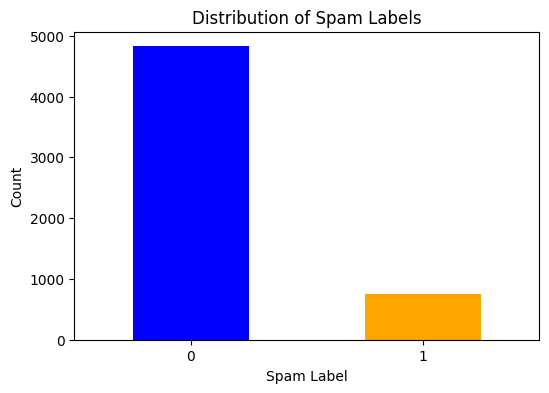

In [17]:
plt.figure(figsize=(6, 4))  # Adjust figure size if needed
count.plot(kind='bar', color=['blue', 'orange'])  # Use different colors
plt.title('Distribution of Spam Labels')
plt.xlabel('Spam Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

In [19]:
X=df['text']
y=df['label']


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

balancing the dataset

In [23]:
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [34]:
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC(kernel='linear', probability=True)

In [45]:
# Train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, color):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=color)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(5,5))
    plt.plot(recall, precision, color='red')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.show()
    return pd.DataFrame({'Model': model_name, 'Actual': y_test, 'Predicted': y_pred})

## naive bayes performance


=== Naive Bayes ===
Accuracy: 0.9677
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.85      0.92      0.88       150

    accuracy                           0.97      1115
   macro avg       0.92      0.95      0.93      1115
weighted avg       0.97      0.97      0.97      1115



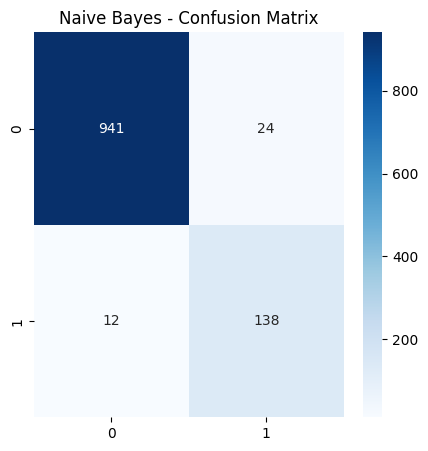

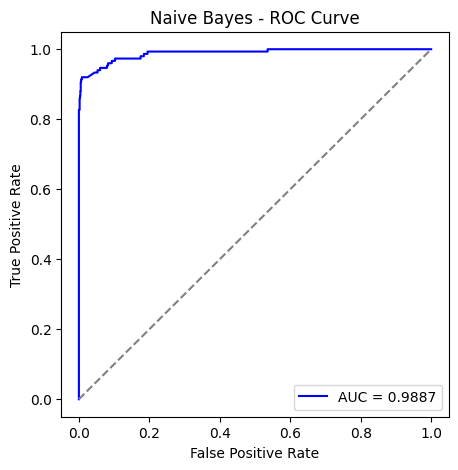

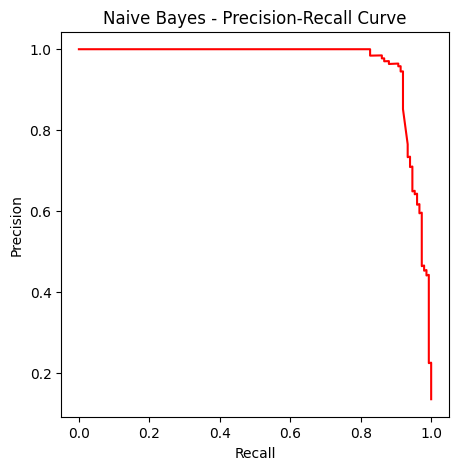

In [49]:

nb_results=evaluate_model(nb_model, X_train_tfidf_resampled, y_train_resampled, X_test_tfidf, y_test, "Naive Bayes", 'Blues')


# Logistic regression **performance**


=== Logistic Regression ===
Accuracy: 0.9767
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.93      0.89      0.91       150

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



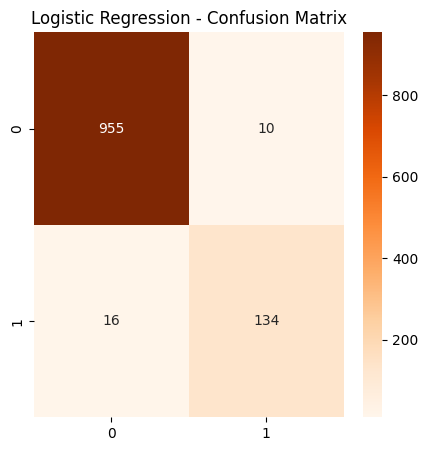

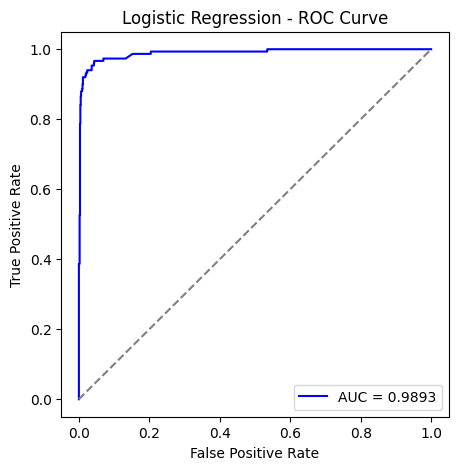

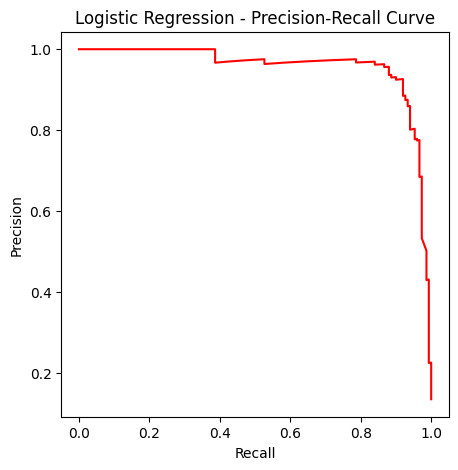

In [47]:

lr_results=evaluate_model(lr_model, X_train_tfidf_resampled, y_train_resampled, X_test_tfidf, y_test, "Logistic Regression", 'Oranges')


# **SVM performance**


=== Support Vector Machine ===
Accuracy: 0.9803
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.95      0.90      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



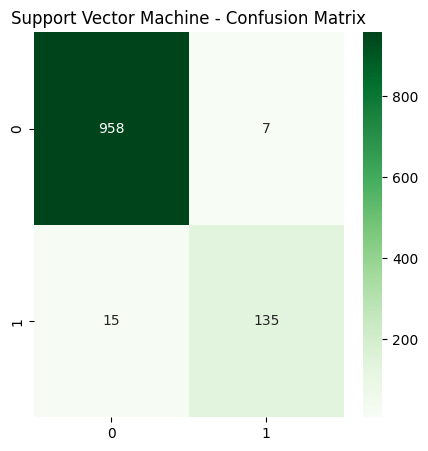

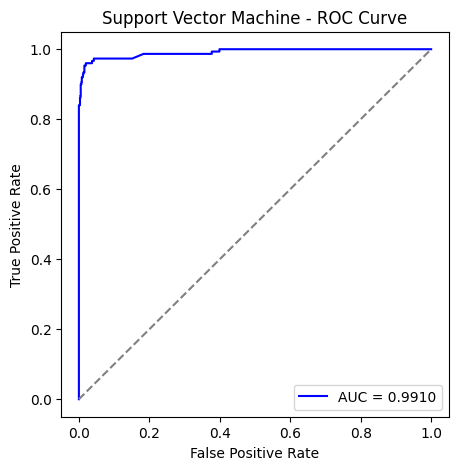

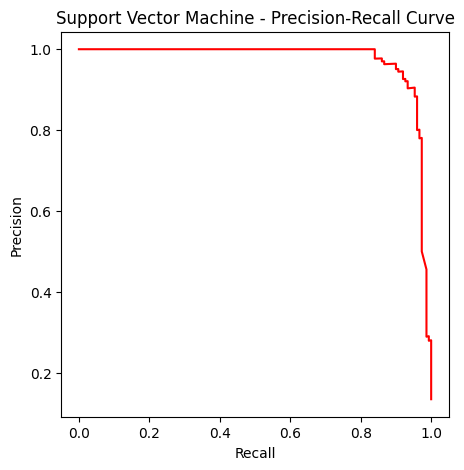

In [48]:
svm_results=evaluate_model(svm_model, X_train_tfidf_resampled, y_train_resampled, X_test_tfidf, y_test, "Support Vector Machine", 'Greens')

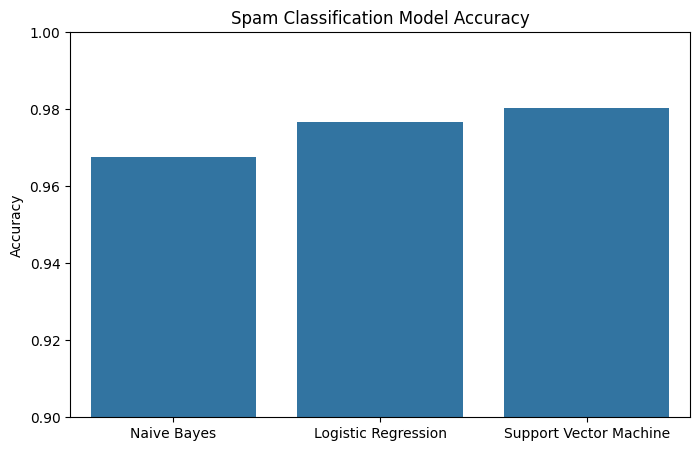

In [40]:
# Visualize accuracy of all models
results = {
    "Naive Bayes": accuracy_score(y_test, nb_model.predict(X_test_tfidf)),
    "Logistic Regression": accuracy_score(y_test, lr_model.predict(X_test_tfidf)),
    "Support Vector Machine": accuracy_score(y_test, svm_model.predict(X_test_tfidf))
}
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0.9, 1.0)
plt.ylabel("Accuracy")
plt.title("Spam Classification Model Accuracy")
plt.show()

In [50]:
all_results = pd.concat([nb_results, lr_results, svm_results], ignore_index=True)
all_results.to_csv("all_models_predictions.csv", index=False)
